<a href="https://colab.research.google.com/github/Hanzala491/Churn_Summary_Overview/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required library for Excel support (if not already)
!pip install openpyxl

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import joblib

# Upload the Excel file to Colab
from google.colab import files
uploaded = files.upload()

# Read the uploaded file (replace with your filename from upload)
file_path = "Prediction_Data.xlsx"  # If you uploaded this file

# Define the sheet name
sheet_name = 'vw_ChurnData'

# Load the data
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Show first few rows
print(data.head())


Saving Prediction_Data.xlsx to Prediction_Data.xlsx
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11167-WES  Female   43     Yes     West Bengal                    3   
2   11179-MAH    Male   35      No     Maharashtra                   10   
3   11180-TAM    Male   75     Yes      Tamil Nadu                   12   
4   11241-MAD  Female   41     Yes  Madhya Pradesh                    4   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                28     Deal 1           Yes            Yes  ...   
2                12        NaN           Yes             No  ...   
3                27     Deal 2           Yes             No  ...   
4                11        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal     

In [2]:
# Step 1: Drop unnecessary columns
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# Step 2: Define columns to label encode
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Step 3: Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))  # ensure all values are strings

# Step 4: Encode the target column manually
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Step 5: Separate features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Step 6: Split into training and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Step 1: Import the classifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[855]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855

    accuracy                           1.00       855
   macro avg       1.00      1.00      1.00       855
weighted avg       1.00      1.00      1.00       855



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


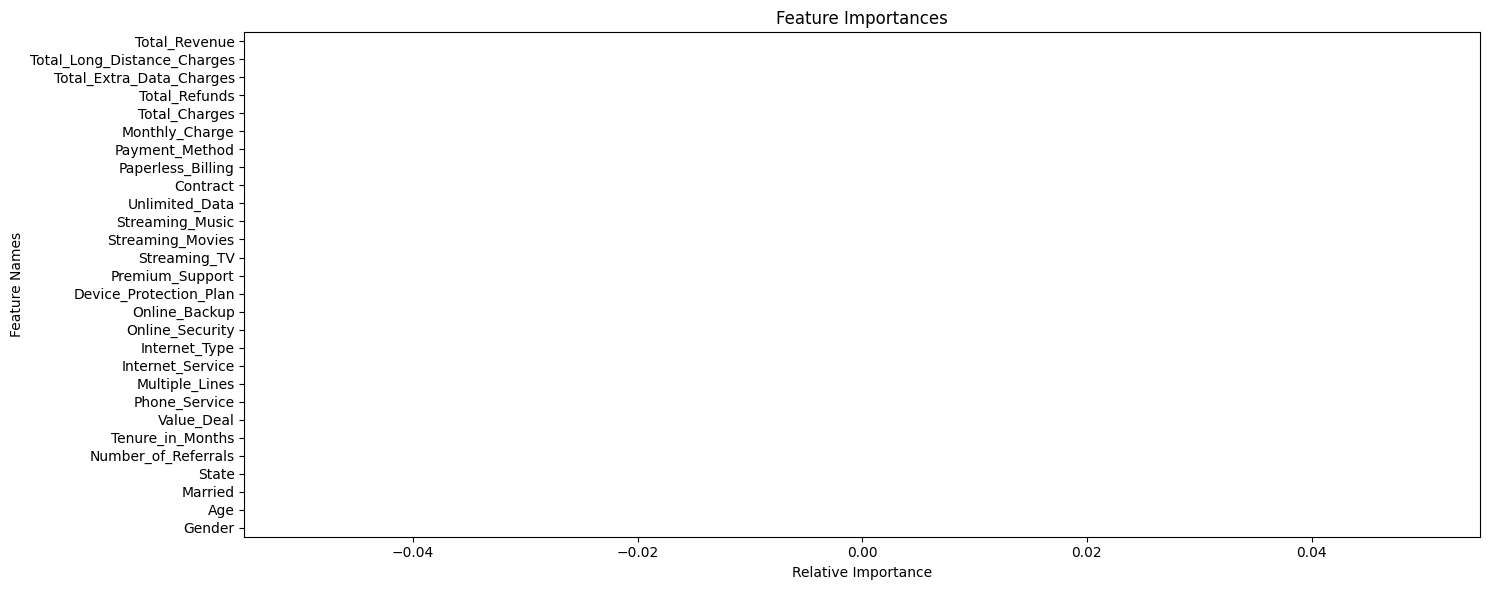

In [4]:
# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Step 7: Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.tight_layout()
plt.show()

In [5]:
# Step 1: Upload the new Excel file
from google.colab import files
uploaded = files.upload()  # Upload Prediction_Data.xlsx again or a different file

# Step 2: Read the Joiner Data from the correct sheet
file_path = "Prediction_Data.xlsx"  # Replace with your uploaded filename if different
sheet_name = 'vw_JoinData'

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Step 3: Display the first few rows
print(new_data.head())

# Step 4: Preserve a copy of the original data (with unencoded columns)
original_data = new_data.copy()

# Step 5: Keep the Customer_ID separately
customer_ids = new_data['Customer_ID']

# Step 6: Drop columns not needed for prediction
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Step 7: Encode categorical columns using the same encoders used during training
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column].astype(str))
    else:
        print(f"Warning: No encoder found for {column}. Skipping encoding.")

# Step 8: Make predictions using the trained model
new_predictions = rf_model.predict(new_data)

# Step 9: Add predictions to the original (unencoded) dataset
original_data['Customer_Status_Predicted'] = new_predictions

# Step 10: Filter only predicted "Churned" customers (i.e., label 1)
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# Step 11: Save the filtered result to a CSV file
churned_customers.to_csv("Predictions.csv", index=False)

# Step 12: Download the CSV file to your system
files.download("Predictions.csv")


Saving Prediction_Data.xlsx to Prediction_Data (1).xlsx
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12056-WES    Male   27      No     West Bengal                    2   
1   12136-RAJ  Female   25     Yes       Rajasthan                    2   
2   12257-ASS  Female   39      No           Assam                    9   
3   13058-MAD  Female   58      No  Madhya Pradesh                   13   
4   13123-BIH  Female   46      No           Bihar                   13   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                20        NaN           Yes             No  ...   
1                35        NaN           Yes             No  ...   
2                 1        NaN           Yes             No  ...   
3                22        NaN           Yes             No  ...   
4                18     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>